# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

Fill missing values with median of that particular column

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [6]:
import pandas as pd
can=pd.read_csv("bc2.csv")


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [7]:
can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [28]:
print(can.dtypes)

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [31]:
can.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [32]:
print(can["Bare Nuclei"])

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object


### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [68]:
print('the count of ? in column Bare Nuclei is: ')
print(can["Bare Nuclei"][can["Bare Nuclei"]=='?'].count())


the count of ? in column Bare Nuclei is: 
0


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [54]:
print(can.describe(include="all"))

print("\n\nthe top value in column Bare Nuclei is")
print(can["Bare Nuclei"].describe(include="all").top)

can["Bare Nuclei"].replace(to_replace =can["Bare Nuclei"][can["Bare Nuclei"]=='?'],  
                            value =can["Bare Nuclei"].describe(include="all").top, inplace=True) 
print('\n\nthe count of ? in column Bare Nuclei is: ')
print(can["Bare Nuclei"][can["Bare Nuclei"]=='?'].count())

                  ID  ClumpThickness   Cell Size  Cell Shape  \
count   6.990000e+02      699.000000  699.000000  699.000000   
unique           NaN             NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN   
mean    1.071704e+06        4.417740    3.134478    3.207439   
std     6.170957e+05        2.815741    3.051459    2.971913   
min     6.163400e+04        1.000000    1.000000    1.000000   
25%     8.706885e+05        2.000000    1.000000    1.000000   
50%     1.171710e+06        4.000000    1.000000    1.000000   
75%     1.238298e+06        6.000000    5.000000    5.000000   
max     1.345435e+07       10.000000   10.000000   10.000000   

        Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
count          699.000000                   699.000000         699   
unique                NaN                          NaN          10   
top                  

### Question 5
#### Find the distribution of target variable (Class) 

In [65]:
pd.value_counts(can["Class"])



2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

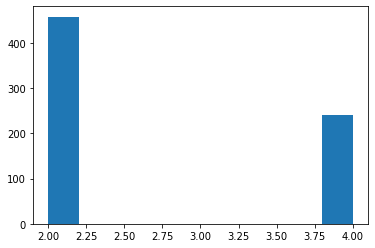

In [69]:
import matplotlib.pyplot as plt
plt.hist(can['Class'])

#### Convert the datatype of Bare Nuclei to `int`

In [78]:
can["Bare Nuclei"] = can["Bare Nuclei"].astype('int64')
print(can.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB
None


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
#sns.pairplot(can)
print(sns.pairplot(can,diag_kind='kde'))
print(can.corr())
can = can.drop('Cell Size')

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#divide in featue set in x
x=can.drop(['Class','ID'],axis=1)

#divide in target set in y
y=can['Class']


#### Divide the Training and Test sets in 70:30 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [128]:
knn=KNeighborsClassifier(n_neighbors=5)
sc=StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [139]:
knn3=KNeighborsClassifier(n_neighbors=3)
scaledX_test = sc.transform(X_test)
knn3.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn3.score(scaledX_test,y_test))

What is the Testing Accuracy
0.95


In [138]:
knn3=KNeighborsClassifier(n_neighbors=5)
scaledX_test = sc.transform(X_test)
knn3.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn3.score(scaledX_test,y_test))

What is the Testing Accuracy
0.9642857142857143


In [141]:
knn3=KNeighborsClassifier(n_neighbors=9)
scaledX_test = sc.transform(X_test)
knn3.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn3.score(scaledX_test,y_test))

What is the Testing Accuracy
0.9571428571428572


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [148]:
neighbors = np.arange(1,20,2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
   X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30,random_state=1)
   sc=StandardScaler()
   scaledX_train = sc.fit_transform(X_train)
   scaledX_test = sc.transform(X_test)
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(scaledX_train,Y_train)
   #Compute accuracy on the training set
   train_accuracy_plot[i] = knn.score(scaledX_train,Y_train)
   print("What is the Train Accuracy for k="+str(k))
   print(train_accuracy_plot[i])
   #Compute accuracy on the testing set
   test_accuracy_plot[i] = knn.score(scaledX_test,Y_test)
   print("What is the Test Accuracy for k="+str(k))
   print(test_accuracy_plot[i])

What is the Train Accuracy for k=1
1.0
What is the Test Accuracy for k=1
0.9523809523809523
What is the Train Accuracy for k=3
0.9693251533742331
What is the Test Accuracy for k=3
0.9666666666666667
What is the Train Accuracy for k=5
0.967280163599182
What is the Test Accuracy for k=5
0.9809523809523809
What is the Train Accuracy for k=7
0.9652351738241309
What is the Test Accuracy for k=7
0.9714285714285714
What is the Train Accuracy for k=9
0.967280163599182
What is the Test Accuracy for k=9
0.9666666666666667
What is the Train Accuracy for k=11
0.9652351738241309
What is the Test Accuracy for k=11
0.9619047619047619
What is the Train Accuracy for k=13
0.9631901840490797
What is the Test Accuracy for k=13
0.9619047619047619
What is the Train Accuracy for k=15
0.9631901840490797
What is the Test Accuracy for k=15
0.9619047619047619
What is the Train Accuracy for k=17
0.9652351738241309
What is the Test Accuracy for k=17
0.9619047619047619
What is the Train Accuracy for k=19
0.96523517

In [150]:
print('The optimal value of k is 5')

The optimal value of k is 5


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

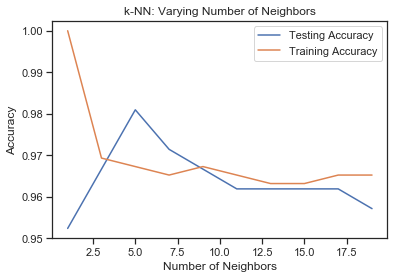

In [151]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
